--- ACTIVIDAD 1: Detección de Nota Musical ---
Grabando...
Grabación terminada


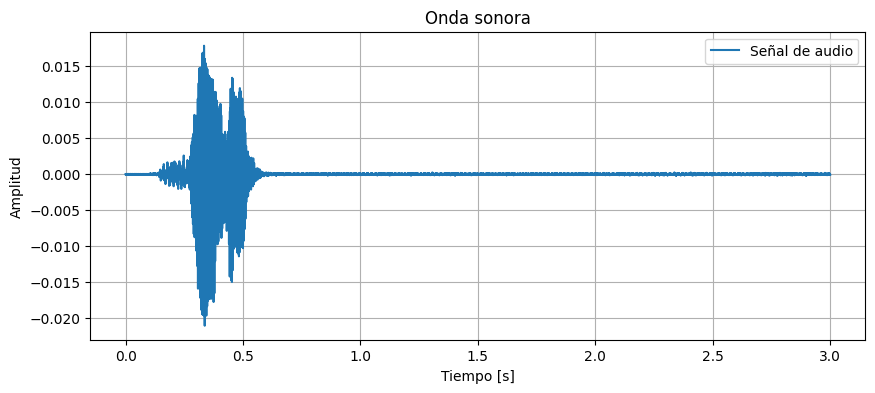

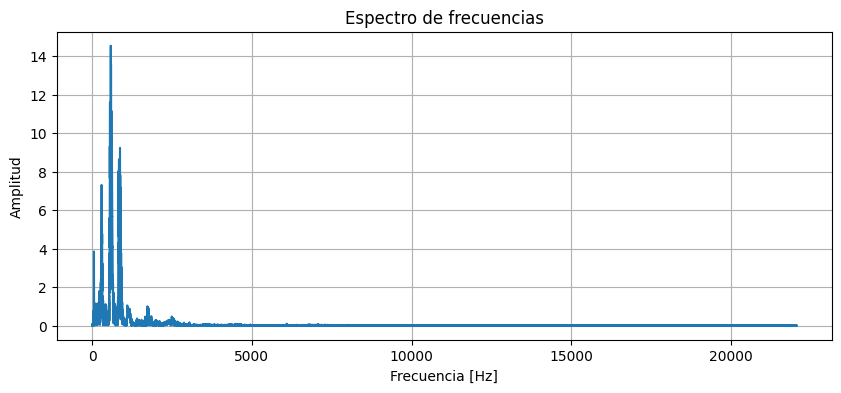

Frecuencias detectadas (primeros 3 armónicos):
   Frecuencia (Hz)   Amplitud
0       583.000000  14.542080
1       591.666667  13.608923
2       558.333333  11.597394
Frecuencia fundamental estimada: 583.00 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fftpack as fft
import sounddevice as sd
import pandas as pd

# Parámetros
DURATION = 3  # segundos
SAMPLE_RATE = 44100  # Hz

def record_audio(duration=DURATION, sample_rate=SAMPLE_RATE):
    print("Grabando...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()
    print("Grabación terminada")
    return audio.flatten()

def plot_waveform(audio, sample_rate):
    t = np.linspace(0, len(audio) / sample_rate, num=len(audio))
    plt.figure(figsize=(10, 4))
    plt.plot(t, audio, label='Señal de audio')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.title('Onda sonora')
    plt.legend()
    plt.grid()
    plt.show()

def analyze_spectrum(audio, sample_rate):
    N = len(audio)
    freqs = fft.fftfreq(N, 1/sample_rate)
    spectrum = np.abs(fft.fft(audio))
    
    plt.figure(figsize=(10, 4))
    plt.plot(freqs[:N//2], spectrum[:N//2])
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')
    plt.title('Espectro de frecuencias')
    plt.grid()
    plt.show()
    
    peaks, _ = signal.find_peaks(spectrum[:N//2], height=max(spectrum[:N//2]) * 0.2)
    harmonics = sorted([(freqs[p], spectrum[p]) for p in peaks], key=lambda x: x[1], reverse=True)[:3]
    
    print("Frecuencias detectadas (primeros 3 armónicos):")
    harmonic_table = pd.DataFrame(harmonics, columns=["Frecuencia (Hz)", "Amplitud"])
    print(harmonic_table)
    
    return harmonics

# Ejecución de Actividad 1
print("--- ACTIVIDAD 1: Detección de Nota Musical ---")
audio = record_audio()
plot_waveform(audio, SAMPLE_RATE)
harmonics = analyze_spectrum(audio, SAMPLE_RATE)
fundamental_freq = harmonics[0][0] if harmonics else 0
print(f'Frecuencia fundamental estimada: {fundamental_freq:.2f} Hz')


--- ACTIVIDAD 2: Análisis de Acordes ---
Capturando acorde...
Grabando...
Grabación terminada


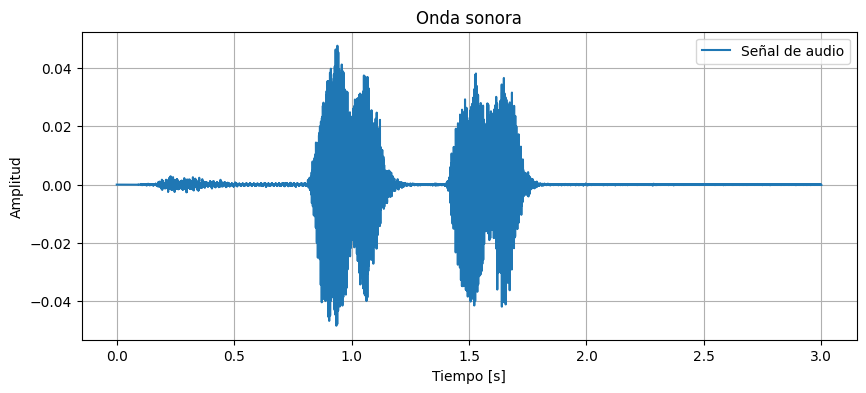

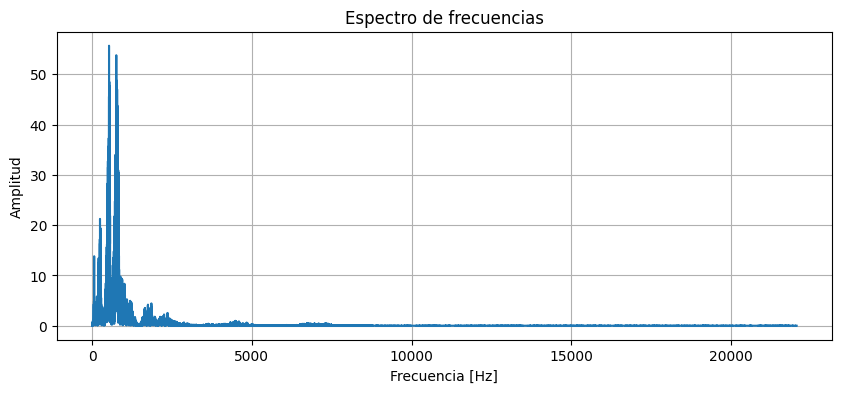

Frecuencias detectadas (primeros 3 armónicos):
   Frecuencia (Hz)   Amplitud
0       529.000000  55.680511
1       756.333333  53.791973
2       530.666667  52.411549
Comparando frecuencias del acorde...


In [ ]:
def analyze_chord():
    print("Capturando acorde...")
    audio = record_audio()
    plot_waveform(audio, SAMPLE_RATE)
    harmonics = analyze_spectrum(audio, SAMPLE_RATE)
    return harmonics

# Ejecución de Actividad 2
print("--- ACTIVIDAD 2: Análisis de Acordes ---")
chord_harmonics = analyze_chord()


--- ACTIVIDAD 3: Predicción de Longitud de Cuerda ---
Capturando nueva frecuencia...
Grabando...
Grabación terminada


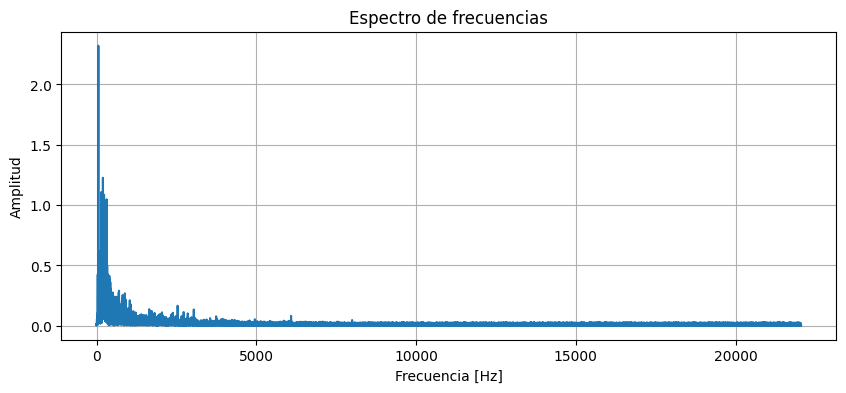

Frecuencias detectadas (primeros 3 armónicos):
   Frecuencia (Hz)  Amplitud
0        58.000000  2.320512
1        57.333333  2.222831
2        56.666667  1.508638
Nueva longitud de cuerda estimada: 15.078 m


In [3]:
def calculate_string_length(initial_length, fundamental_freq, new_audio):
    new_harmonics = analyze_spectrum(new_audio, SAMPLE_RATE)
    new_freq = new_harmonics[0][0] if new_harmonics else 0
    new_length = initial_length * (fundamental_freq / new_freq)
    print(f'Nueva longitud de cuerda estimada: {new_length:.3f} m')
    return new_length

# Ejecución de Actividad 3
print("--- ACTIVIDAD 3: Predicción de Longitud de Cuerda ---")
initial_length = float(input("Ingrese la longitud inicial de la cuerda (m): "))
print("Capturando nueva frecuencia...")
new_audio = record_audio()
new_length = calculate_string_length(initial_length, fundamental_freq, new_audio)


--- ACTIVIDAD 4: Cálculo de Tensión de la Cuerda ---

Cuerda 1:
  Tensión calculada: 6480000.00 N

Cuerda 2:
  Tensión calculada: 11520000.00 N

Cuerda 3:
  Tensión calculada: 5574942.72 N

Cuerda 4:
  Tensión calculada: 11514148.42 N


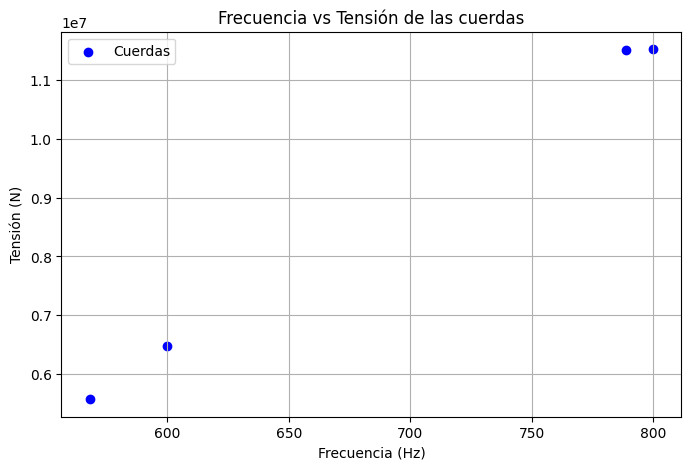

In [6]:
def analyze_tension():
    n = int(input("Ingrese el número de cuerdas: "))
    freqs = []
    tensions = []
    for i in range(1, n + 1):
        print(f"\nCuerda {i}:")
        mu = float(input("  Ingrese la densidad lineal de masa (kg/m): "))
        L = float(input("  Ingrese la longitud de la cuerda (m): "))
        f = float(input("  Ingrese la frecuencia de la nota musical (Hz): "))
        
        # Calcula la velocidad de la onda: para la nota fundamental en una cuerda fija, λ = 2L
        v = 2 * L * f
        # Calcula la tensión usando T = mu * v^2
        tension = mu * v**2
        print(f"  Tensión calculada: {tension:.2f} N")
        
        freqs.append(f)
        tensions.append(tension)
    
    # Graficar frecuencia vs tensión
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 5))
    plt.scatter(freqs, tensions, color='b', label="Cuerdas")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Tensión (N)")
    plt.title("Frecuencia vs Tensión de las cuerdas")
    plt.grid(True)
    plt.legend()
    plt.show()

# Ejecución de Actividad 4:
print("--- ACTIVIDAD 4: Cálculo de Tensión de la Cuerda ---")
analyze_tension()
